# Argon worksheet compute everything

## Import all functions from ArgonFunc

In [1]:
import ArgonFunc as ar
from imp import reload
reload(ar);
%matplotlib inline
import numpy as np

### Compute Cv using a energy conserving program
First, gas conditions where rho = 0.01 and T = 2 

Then, solid conditions where rho = 0.99 and T = 0.1

Cv/kb/N =  1.5124139856


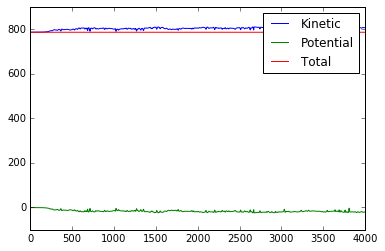

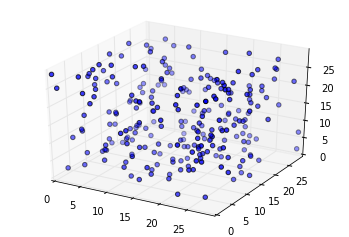

In [2]:
# --------- conserve E program --------------
# gas conditions where rho = 0.01 and T = 2 
pos,vel,rho,T,n,timesteps,dt,N,L = ar.init_params(rhopar=0.01,Tpar=2,npar=4,tfinpar=4000)
pos2,vel2,K,V,rV = ar.evolveTimeConserveE(pos,vel,timesteps,N,L,dt)

Cv = 1 / (2/(3*N) - np.var(K[200::])/(K[200::].mean()**2))
print("Cv/kb/N = ",Cv/N)

ar.plotEnergy(timesteps,K,V)
ar.plotParticles(pos2,L)
ar.plt.show()

Cv/kb/N =  3.02937199979


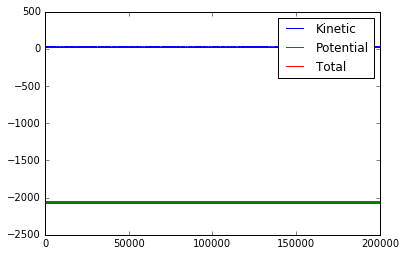

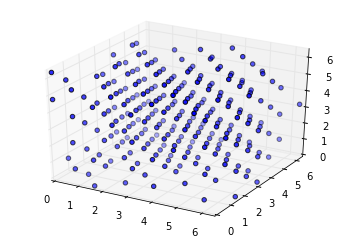

In [3]:
# --------- conserve E program --------------
# solid conditions where rho = 0.99 and T = 0.1
pos,vel,rho,T,n,timesteps,dt,N,L = ar.init_params(0.99,0.1,4,200000)
pos2,vel2,K,V,rV = ar.evolveTimeConserveE(pos,vel,timesteps,N,L,dt)

Cv = 1 / (2/(3*N) - np.var(K[2000::])/(K[2000::].mean()**2))
print("Cv/kb/N = ",Cv/N)

ar.plotEnergy(timesteps,K,V)
ar.plotParticles(pos2,L)
ar.plt.show()

In [4]:
# -------- Fixed T program ------------------
pos,vel,rho,T,n,timesteps,dt,N,L = ar.init_params(0.75,1,4,10000)
pos2,vel2,K,V,rV = ar.evolveTimeFixedT(pos,vel,timesteps,N,L,dt,T)

In [5]:
P = np.mean(1/(L**3) * ( 2*K - rV )/3)

In [6]:
print(P)

0.516915586989
